# Лабораторная работа №5

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import sklearn
import mglearn
import mglearn.datasets

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [165]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, load_linnerud


diabetes = load_diabetes()
print("Датасет diabetes:")
print(diabetes.DESCR)
print("Признаки (X):")
print(diabetes.data[:5])  
print("Целевая переменная (y):")
print(diabetes.target[:5])



Датасет diabetes:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Not

In [4]:
diabetes_df = pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['target'])
print("DataFrame датасета diabetes:")
print(diabetes_df.head())

DataFrame датасета diabetes:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


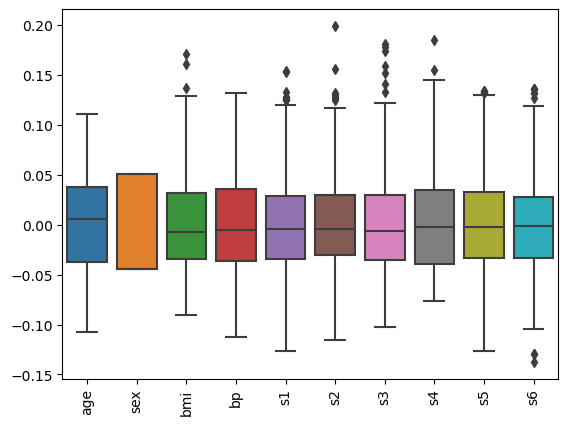

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


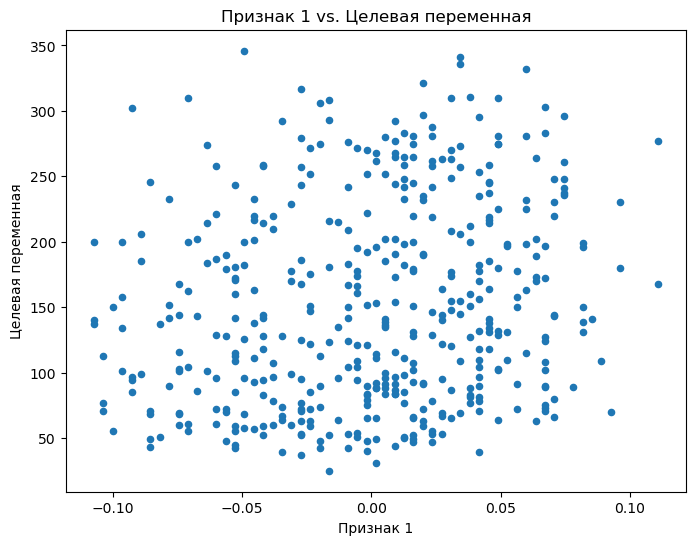

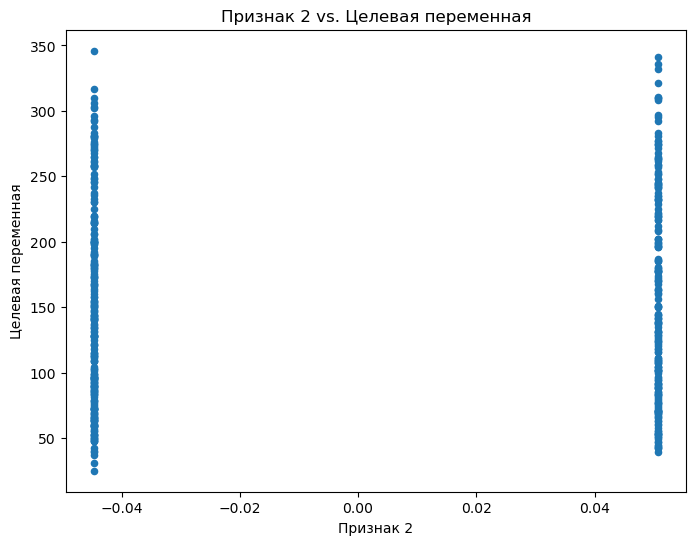

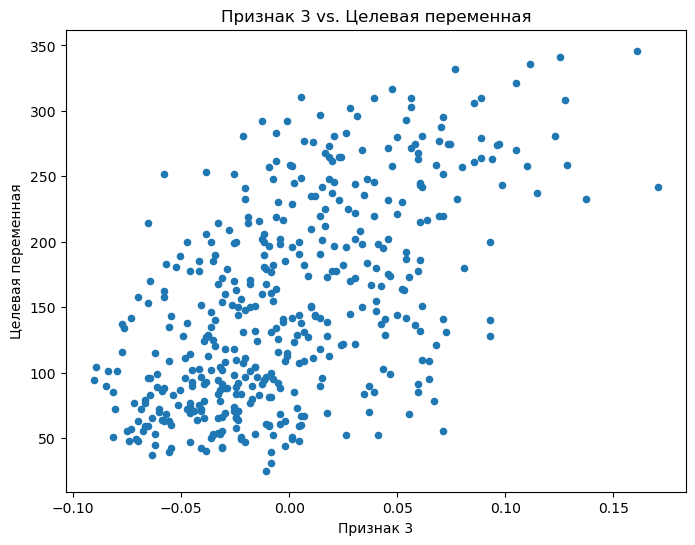

In [166]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for feature_index in range(3):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, feature_index], y, s=20)
    plt.title(f"Признак {feature_index + 1} vs. Целевая переменная")
    plt.xlabel(f"Признак {feature_index + 1}")
    plt.ylabel("Целевая переменная")
    plt.show()

In [179]:
knn_regressor = KNeighborsRegressor(n_neighbors=8)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [180]:
y_pred = knn_regressor.predict(X_test)

In [181]:
print("test {:.2f}".format(knn_regressor.score(X_test, y_test)))

test 0.44


In [182]:
y_pred = knn_regressor.predict(X_test)

test 0.44


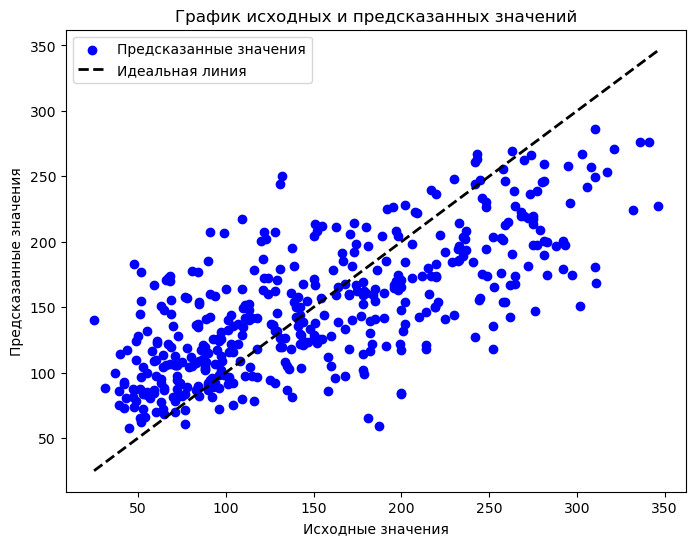

In [183]:
print("test {:.2f}".format(knn_regressor.score(X_test, y_test)))
y_pred = knn_regressor.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, c='b', label='Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Идеальная линия')
plt.xlabel('Исходные значения')
plt.ylabel('Предсказанные значения')
plt.title('График исходных и предсказанных значений')
plt.legend()
plt.show()

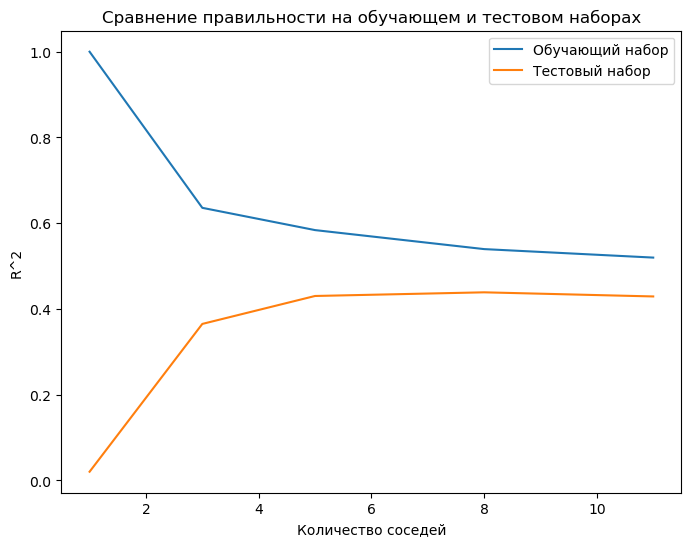

In [184]:
# Разные значения количества соседей
n_neighbors = [1, 3, 5, 8, 11]

train_scores = []
test_scores = []

for k in n_neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)

    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, train_scores, label='Обучающий набор')
plt.plot(n_neighbors, test_scores, label='Тестовый набор')
plt.xlabel('Количество соседей')
plt.ylabel('R^2')
plt.title('Сравнение правильности на обучающем и тестовом наборах')
plt.legend()
plt.show()

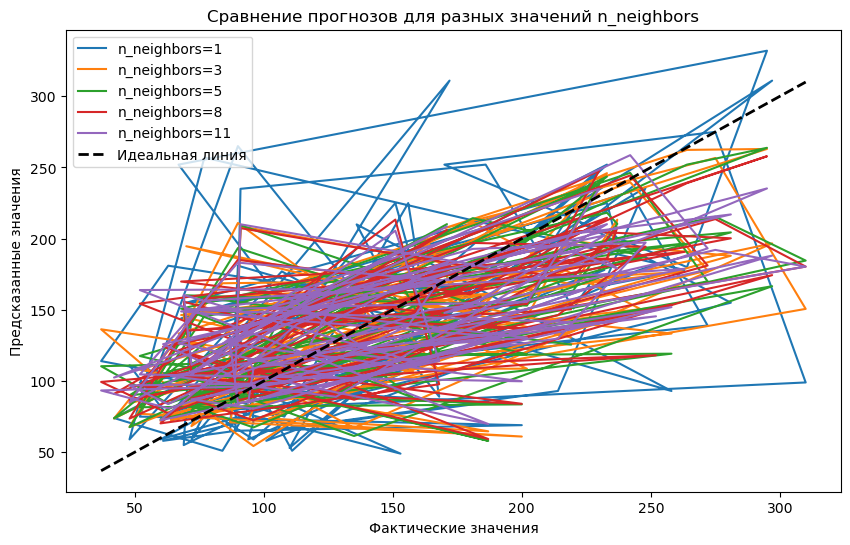

In [185]:
predictions = []

for k in n_neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    predictions.append(y_pred)

# Построение графика
plt.figure(figsize=(10, 6))
for i, k in enumerate(n_neighbors):
    plt.plot(y_test, predictions[i], label=f'n_neighbors={k}')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение прогнозов для разных значений n_neighbors')
plt.legend()
plt.show()

In [186]:
# Модель LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_diabetes_pred_linear = linear_regressor.predict(X_test)

# Модель Ridge
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)
y_diabetes_pred_ridge = ridge_regressor.predict(X_test)

# Модель Lasso
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)
y_diabetes_pred_lasso = lasso_regressor.predict(X_test)

In [187]:
from sklearn.metrics import r2_score

# Предсказание значений на тестовом наборе данных
y_pred_test = knn_regressor.predict(X_test)

# Предсказание значений на тренировочном наборе данных
y_pred_train = knn_regressor.predict(X_train)

# Оценка качества модели на тестовых данных с использованием R^2
r2_test = r2_score(y_test, y_pred_test)
print("R^2 на тестовом наборе данных: {:.2f}".format(r2_test))

# Оценка качества модели на тренировочных данных с использованием R^2
r2_train = r2_score(y_train, y_pred_train)
print("R^2 на тренировочном наборе данных: {:.2f}".format(r2_train))

R^2 на тестовом наборе данных: 0.43
R^2 на тренировочном наборе данных: 0.52


In [188]:
print("test {:.2f}".format(knn_regressor.score(X_test, y_test)))

test 0.43


In [189]:
print("lr.coef_:{}".format(linear_regressor.coef_))
print("lr.intercept_: {}".format(linear_regressor.intercept_))

lr.coef_:[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
lr.intercept_: 151.34560453985995


In [190]:
print("test {:.2f}".format(linear_regressor.score(X_test, y_test)))
print("test {:.2f}".format(linear_regressor.score(X_train, y_train)))

test 0.45
test 0.53


In [191]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Линейная регрессия без регуляризации
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_score_train = linear_regressor.score(X_train, y_train)
linear_score_test = linear_regressor.score(X_test, y_test)

print("Линейная регрессия  - Оценка на обучающих данных: {:.2f}".format(linear_score_train))
print("Линейная регрессия  - Оценка на тестовых данных: {:.2f}".format(linear_score_test))

# Лассо регрессия (L1 регуляризация)
lasso_regressor = Lasso(alpha=0.03) 
lasso_regressor.fit(X_train, y_train)
lasso_score_train = lasso_regressor.score(X_train, y_train)
lasso_score_test = lasso_regressor.score(X_test, y_test)

print("Лассо регрессия - Оценка на обучающих данных: {:.2f}".format(lasso_score_train))
print("Лассо регрессия - Оценка на тестовых данных: {:.2f}".format(lasso_score_test))
print("количество использованных признаков: {}".format(np.sum(lasso_regressor.coef_ != 0)))
# Гребневая регрессия (L2 регуляризация)
ridge_regressor = Ridge(alpha=0.02)  # Здесь alpha - параметр регуляризации
ridge_regressor.fit(X_train, y_train)
ridge_score_train = ridge_regressor.score(X_train, y_train)
ridge_score_test = ridge_regressor.score(X_test, y_test)

print("Гребневая регрессия - Оценка на обучающих данных: {:.2f}".format(ridge_score_train))
print("Гребневая регрессия - Оценка на тестовых данных: {:.2f}".format(ridge_score_test))



Линейная регрессия  - Оценка на обучающих данных: 0.53
Линейная регрессия  - Оценка на тестовых данных: 0.45
Лассо регрессия - Оценка на обучающих данных: 0.52
Лассо регрессия - Оценка на тестовых данных: 0.46
количество использованных признаков: 9
Гребневая регрессия - Оценка на обучающих данных: 0.53
Гребневая регрессия - Оценка на тестовых данных: 0.46


In [192]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Загрузка набора данных diabetes
diabetes = load_diabetes()

# Разделение данных на признаки (X) и целевую переменную (y)
X = diabetes.data
y = diabetes.target

# Создание бинарной метки: 1 для высокого уровня глюкозы и 0 для низкого уровня глюкозы
threshold = 140  # Пример порогового значения, которое разделяет высокий и низкий уровень глюкозы
y_binary = (y > threshold).astype(int)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Создание и обучение модели LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = logistic_reg.predict(X_test)

# Вычисление точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели LogisticRegression: {:.2f}".format(accuracy))


Точность модели LogisticRegression: 0.74


In [193]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Загрузка данных
diabetes = datasets.load_diabetes()
X = diabetes.data  # Признаки
y = (diabetes.target > 200).astype(int)  
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели LinearSVC
svc = LinearSVC(dual=False)
svc.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = svc.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели LinearSVC: {:.2f}".format(accuracy))


Точность модели LinearSVC: 0.83


# Результаты:

регрессия ближайших соседей
R^2 на тестовом наборе данных: 0.43

R^2 на тренировочном наборе данных: 0.52

Линейная регрессия  - Оценка на обучающих данных: 0.53

Линейная регрессия  - Оценка на тестовых данных: 0.45

Лассо регрессия - Оценка на обучающих данных: 0.52

Лассо регрессия - Оценка на тестовых данных: 0.46

количество использованных признаков: 9

Гребневая регрессия - Оценка на обучающих данных: 0.53

Гребневая регрессия - Оценка на тестовых данных: 0.46

модели LogisticRegression

Точность модели LogisticRegression: 0.74

модели LinearSVC

Точность модели LinearSVC: 0.83

Датасет "Diabetes" представляет собой информацию о 442 пациентах с диабетом. Для каждого пациента были получены данные по десяти базовым переменным, таким как возраст, пол, индекс массы тела, среднее артериальное давление, а также шесть измерений биохимических показателей в крови. Кроме того, в датасете есть колонка, которая представляет собой количественную меру прогрессирования заболевания один год после начальной оценки.

Из этих результатов видно, что модели регрессии (K-Nearest Neighbors, Linear Regression, Lasso Regression, Ridge Regression) имеют схожие значения оценок R^2, их производительность не сильно разнится. 

Модели классификации (LogisticRegression и LinearSVC) также имеют неплохую точность, LinearSVC продемонстрировала лучшую точность из выше представленных.